In [1]:
import yfinance as yf
import pandas as pd
from datetime import date

# Define the stock and the time period
ticker_symbol = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = date.today().strftime("%Y-%m-%d")
try:
    print(f"Downloading 5 years of stock data for {ticker_symbol}...")
    stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)

    if not stock_df.empty:
        file_path = "reliance_stock_data_5_years.csv"
        stock_df.to_csv(file_path)
        print(f"✅ Success! Data downloaded and saved to '{file_path}'")
        print(f"Data shape: {stock_df.shape}")
        display(stock_df.tail())
    else:
        print("❌ Download failed. The returned data was empty.")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipykernel_2346/1613629470.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Success! Data downloaded and saved to 'reliance_stock_data_5_years.csv'
Data shape: (1454, 5)


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-11-06,1496.099976,1501.599976,1476.199951,1484.000000,16772678
2025-11-07,1478.000000,1498.400024,1475.900024,1494.599976,7821765
2025-11-10,1489.300049,1501.000000,1475.500000,1477.900024,7068438
2025-11-11,1493.400024,1498.800049,1480.199951,1497.000000,7127506
2025-11-12,1511.500000,1524.699951,1500.000000,1505.000000,12384459


In [2]:
!pip install gnews

In [3]:
import pandas as pd
from gnews import GNews
import time
from datetime import datetime

# This list will store all the articles we find
all_news = []
start_year = 2020
end_year = datetime.now().year

print(f"Starting deep news search from {start_year} to {end_year}. This will take a long time...")

# Loop through each year and each month
for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        # Stop if we are in the future
        if year == end_year and month > datetime.now().month:
            break
            
        print(f"Fetching news for month: {year}-{month:02d}...")
        
        # Define the start and end date for the current month
        start_date = (year, month, 1)
        if month == 12:
            end_date = (year + 1, 1, 1)
        else:
            end_date = (year, month + 1, 1)
            
        # Initialize GNews for this specific time period
        google_news = GNews(language='en', country='IN', start_date=start_date, end_date=end_date)
        
        # Get the news and add it to our master list
        monthly_news = google_news.get_news('Reliance Industries')
        if monthly_news:
            all_news.extend(monthly_news)
        
        # Be polite to the server and wait 1 second between requests
        time.sleep(1)

# --- Process the final, large dataset ---
if all_news:
    news_df = pd.DataFrame(all_news)
    
    # Clean up and save the data
    news_df = news_df[['published date', 'title', 'publisher']]
    news_df.rename(columns={'published date': 'date', 'publisher': 'source'}, inplace=True)
    
    file_path = "reliance_news_data_FULL.csv"
    news_df.to_csv(file_path, index=False)
    
    print(f"\n✅ FULL news download complete! Data saved to '{file_path}'")
    print(f"Total articles found: {len(news_df)}")
    display(news_df.head())
else:
    print("❌ No articles were found with the deep search.")

Starting deep news search from 2020 to 2025. This will take a long time...
Fetching news for month: 2020-01...


Fetching news for month: 2020-02...


Fetching news for month: 2020-03...


Fetching news for month: 2020-04...


Fetching news for month: 2020-05...


Fetching news for month: 2020-06...


Fetching news for month: 2020-07...


Fetching news for month: 2020-08...


Fetching news for month: 2020-09...


Fetching news for month: 2020-10...


Fetching news for month: 2020-11...


Fetching news for month: 2020-12...


Fetching news for month: 2021-01...


Fetching news for month: 2021-02...


Fetching news for month: 2021-03...


Fetching news for month: 2021-04...


Fetching news for month: 2021-05...


Fetching news for month: 2021-06...


Fetching news for month: 2021-07...


Fetching news for month: 2021-08...


Fetching news for month: 2021-09...


Fetching news for month: 2021-10...


Fetching news for month: 2021-11...


Fetching news for month: 2021-12...


Fetching news for month: 2022-01...


Fetching news for month: 2022-02...


Fetching news for month: 2022-03...


Fetching news for month: 2022-04...


Fetching news for month: 2022-05...


Fetching news for month: 2022-06...


Fetching news for month: 2022-07...


Fetching news for month: 2022-08...


Fetching news for month: 2022-09...


Fetching news for month: 2022-10...


Fetching news for month: 2022-11...


Fetching news for month: 2022-12...


Fetching news for month: 2023-01...


Fetching news for month: 2023-02...


Fetching news for month: 2023-03...


Fetching news for month: 2023-04...


Fetching news for month: 2023-05...


Fetching news for month: 2023-06...


Fetching news for month: 2023-07...


Fetching news for month: 2023-08...


Fetching news for month: 2023-09...


Fetching news for month: 2023-10...


Fetching news for month: 2023-11...


Fetching news for month: 2023-12...


Fetching news for month: 2024-01...


Fetching news for month: 2024-02...


Fetching news for month: 2024-03...


Fetching news for month: 2024-04...


Fetching news for month: 2024-05...


Fetching news for month: 2024-06...


Fetching news for month: 2024-07...


Fetching news for month: 2024-08...


Fetching news for month: 2024-09...


Fetching news for month: 2024-10...


Fetching news for month: 2024-11...


Fetching news for month: 2024-12...


Fetching news for month: 2025-01...


Fetching news for month: 2025-02...


Fetching news for month: 2025-03...


Fetching news for month: 2025-04...


Fetching news for month: 2025-05...


Fetching news for month: 2025-06...


Fetching news for month: 2025-07...


Fetching news for month: 2025-08...


Fetching news for month: 2025-09...


Fetching news for month: 2025-10...


Fetching news for month: 2025-11...



✅ FULL news download complete! Data saved to 'reliance_news_data_FULL.csv'
Total articles found: 6628


,date,title,source
0,"Tue, 21 Jan 2020 08:00:00 GMT",Mukesh Ambani's Reliance Industries is India's...,"{'href': 'https://www.livemint.com', 'title': ..."
1,"Thu, 02 Jan 2020 08:00:00 GMT",Reliance Industries is starting to roll out it...,"{'href': 'https://www.businessinsider.com', 't..."
2,"Fri, 17 Jan 2020 08:00:00 GMT",Reliance Industries posts record Q3 profit at ...,"{'href': 'https://www.businesstoday.in', 'titl..."
3,"Mon, 06 Jan 2020 08:00:00 GMT",Is 2020 The Year That Reliance Becomes India's...,"{'href': 'https://variety.com', 'title': 'Vari..."
4,"Tue, 07 Jan 2020 08:00:00 GMT",Reliance refers to start-up playbook to grow J...,"{'href': 'https://www.business-standard.com', ..."


In [4]:
import pandas as pd

file_path = "reliance_stock_data_5_years.csv"

print("Starting the one-time fix for the stock data CSV file...")

try:
    # Step 1: Load the messy CSV file using our robust command
    clean_df = pd.read_csv(
        file_path,
        index_col=0,
        parse_dates=True,
        skiprows=[1, 2]
    )
    clean_df.index.name = 'Date'
    print(" -> Successfully loaded the messy data into memory.")

    # Step 2: Save the clean DataFrame back to the SAME file path
    # This will OVERWRITE the old, messy file with a clean one.
    clean_df.to_csv(file_path)
    print(f" -> Successfully saved a clean version back to '{file_path}'.")

    print("\n✅✅✅ PERMANENT FIX COMPLETE ✅✅✅")
    print("The stock data CSV file is now permanently fixed. You will not see this error again.")

except Exception as e:
    print(f"An error occurred during the fix: {e}")

Starting the one-time fix for the stock data CSV file...
 -> Successfully loaded the messy data into memory.
 -> Successfully saved a clean version back to 'reliance_stock_data_5_years.csv'.

✅✅✅ PERMANENT FIX COMPLETE ✅✅✅
The stock data CSV file is now permanently fixed. You will not see this error again.


In [5]:
!conda install -c conda-forge nltk -y

CI detected...
By accessing https://repo.anaconda.com/pkgs/main via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
By accessing https://repo.anaconda.com/pkgs/r via CI for this repository you 
acknowledge and agree to the Terms of Service:
ANACONDA TERMS OF SERVICE
Effective Date: July 15, 2025

See https://anaconda.com/legal/terms/terms-of-service
2 channel Terms of Service accepted
Retrieving notices: - 

\ 

| 

done


Channels:
 - conda-forge
 - defaults
Platform: linux-64

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done
Solving environment: \ 

| 

done



## Package Plan ##

  environment location: /usr/share/miniconda

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    joblib-1.5.2               |     pyhd8ed1ab_0         219 KB  conda-forge
    nltk-3.9.2                 |     pyhcf101f3_1         1.1 MB  conda-forge
    regex-2025.9.1             |  py313hee96239_0         398 KB
    ------------------------------------------------------------
                                           Total:         2.0 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-1.5.2-pyhd8ed1ab_0 
  nltk               conda-forge/noarch::nltk-3.9.2-pyhcf101f3_1 
  regex              pkgs/main/linux-64::regex-2025.9.1-py313h




certifi-2025.11.12   | 153 KB    | ###8                                  |  10% 





ca-certificates-2025 | 149 KB    | ###9                                  |  11% 

joblib-1.5.2         | 219 KB    | ##6                                   |   7% 
nltk-3.9.2           | 1.1 MB    | 5                                     |   1% 


certifi-2025.11.12   | 153 KB    | ##################################### | 100% 



ca-certificates-2025 | 149 KB    | ##################################### | 100% 


certifi-2025.11.12   | 153 KB    | ##################################### | 100% 



ca-certificates-2025 | 149 KB    | ##################################### | 100% 



joblib-1.5.2         | 219 KB    | ##################################### | 100% 
regex-2025.9.1       | 398 KB    | ##################################### | 100% 



nltk-3.9.2           | 1.1 MB    | ##################################### | 100% 
regex-2025.9.1       | 398 KB    | ##################################### | 100% 


                                                                                

                                                                                


                                                                                




Preparing transaction: - 

done
Verifying transaction: | 

done
Executing transaction: - 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

done


In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Setup ---
# This directly downloads the required resources.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# --------------------

# Initialize the tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans a text string by making it lowercase, removing punctuation,
    numbers, stopwords, and then lemmatizing the words.
    """
    if not isinstance(text, str):
        return ""
        
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = text.lower().split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(cleaned_words)

print("✅ The clean_text function is now ready to use.")

[nltk_data] Downloading package stopwords to /home/runner/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/runner/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/runner/nltk_data...


✅ The clean_text function is now ready to use.


In [7]:
import pandas as pd

# Load the full news dataset from the CSV file
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)

# Apply our cleaning function to the 'title' column
print("Cleaning all news headlines... this may take a minute.")
news_df['cleaned_title'] = news_df['title'].apply(clean_text)
print("✅ Text cleaning complete.")

# Display the original and cleaned titles to see the result
display(news_df[['title', 'cleaned_title']].head())

Cleaning all news headlines... this may take a minute.


✅ Text cleaning complete.


,title,cleaned_title
0,Mukesh Ambani's Reliance Industries is India's...,mukesh ambanis reliance industry india answer ...
1,Reliance Industries is starting to roll out it...,reliance industry starting roll new ecommerce ...
2,Reliance Industries posts record Q3 profit at ...,reliance industry post record q profit r crore...
3,Is 2020 The Year That Reliance Becomes India's...,year reliance becomes india digital champion v...
4,Reliance refers to start-up playbook to grow J...,reliance refers startup playbook grow jio inte...


In [8]:
import os
import shutil
from pathlib import Path

# Define the cache directory
cache_dir = Path.home() / ".cache" / "huggingface"

try:
    if os.path.exists(cache_dir):
        print(f"Found cache directory at: {cache_dir}")
        shutil.rmtree(cache_dir)
        print("✅ Hugging Face cache has been cleared successfully.")
    else:
        print("Cache directory not found, no action needed.")

except Exception as e:
    print(f"An error occurred while clearing the cache: {e}")

Cache directory not found, no action needed.


In [9]:
import pandas as pd
import torch
# --- CHANGE 1: Import the specific BERT model class ---
from transformers import AutoTokenizer, BertForSequenceClassification

# --- 1. Load the FinBERT Model and Tokenizer ---
print("Loading FinBERT model and tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# --- CHANGE 2: Use the specific class to load the model ---
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")
print("✅ Model and tokenizer loaded.")

# --- 2. Load Your Cleaned News Data ---
file_path = "reliance_news_data_FULL.csv"
news_df = pd.read_csv(file_path)
news_df.dropna(subset=['title'], inplace=True)
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# --- 3. Define a Function for Batch Sentiment Analysis ---
def get_finbert_sentiments(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt", max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_labels = [model.config.id2label[label_id] for label_id in torch.argmax(predictions, dim=1).tolist()]
    return sentiment_labels

# --- 4. Process the Headlines in Batches ---
print("\nStarting sentiment analysis with FinBERT. This will take a very long time...")
batch_size = 64
all_sentiments = []
titles_to_process = news_df['cleaned_title'].tolist()

for i in range(0, len(titles_to_process), batch_size):
    batch = titles_to_process[i:i + batch_size]
    sentiments = get_finbert_sentiments(batch)
    all_sentiments.extend(sentiments)
    print(f"  Processed {min(i + batch_size, len(titles_to_process))}/{len(titles_to_process)} headlines...")

# --- 5. Add Sentiments to DataFrame ---
news_df['finbert_sentiment'] = all_sentiments
print("\n✅ FinBERT sentiment analysis complete.")
display(news_df[['cleaned_title', 'finbert_sentiment']].head())

# Save the results to a new CSV
news_df.to_csv("reliance_news_with_finbert_sentiment.csv", index=False)
print("✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'")

2025-11-13 14:37:41.624459: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-13 14:37:41.673139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-11-13 14:37:42.824885: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


11/13/2025 02:37:44 PM - Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Can not load face (unknown file format; error code 0x2)


11/13/2025 02:37:44 PM - generated new fontManager


Loading FinBERT model and tokenizer...


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

✅ Model and tokenizer loaded.



Starting sentiment analysis with FinBERT. This will take a very long time...


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

  Processed 64/6628 headlines...


  Processed 128/6628 headlines...


  Processed 192/6628 headlines...


  Processed 256/6628 headlines...


  Processed 320/6628 headlines...


  Processed 384/6628 headlines...


  Processed 448/6628 headlines...


  Processed 512/6628 headlines...


  Processed 576/6628 headlines...


  Processed 640/6628 headlines...


  Processed 704/6628 headlines...


  Processed 768/6628 headlines...


  Processed 832/6628 headlines...


  Processed 896/6628 headlines...


  Processed 960/6628 headlines...


  Processed 1024/6628 headlines...


  Processed 1088/6628 headlines...


  Processed 1152/6628 headlines...


  Processed 1216/6628 headlines...


  Processed 1280/6628 headlines...


  Processed 1344/6628 headlines...


  Processed 1408/6628 headlines...


  Processed 1472/6628 headlines...


  Processed 1536/6628 headlines...


  Processed 1600/6628 headlines...


  Processed 1664/6628 headlines...


  Processed 1728/6628 headlines...


  Processed 1792/6628 headlines...


  Processed 1856/6628 headlines...


  Processed 1920/6628 headlines...


  Processed 1984/6628 headlines...


  Processed 2048/6628 headlines...


  Processed 2112/6628 headlines...


  Processed 2176/6628 headlines...


  Processed 2240/6628 headlines...


  Processed 2304/6628 headlines...


  Processed 2368/6628 headlines...


  Processed 2432/6628 headlines...


  Processed 2496/6628 headlines...


  Processed 2560/6628 headlines...


  Processed 2624/6628 headlines...


  Processed 2688/6628 headlines...


  Processed 2752/6628 headlines...


  Processed 2816/6628 headlines...


  Processed 2880/6628 headlines...


  Processed 2944/6628 headlines...


  Processed 3008/6628 headlines...


  Processed 3072/6628 headlines...


  Processed 3136/6628 headlines...


  Processed 3200/6628 headlines...


  Processed 3264/6628 headlines...


  Processed 3328/6628 headlines...


  Processed 3392/6628 headlines...


  Processed 3456/6628 headlines...


  Processed 3520/6628 headlines...


  Processed 3584/6628 headlines...


  Processed 3648/6628 headlines...


  Processed 3712/6628 headlines...


  Processed 3776/6628 headlines...


  Processed 3840/6628 headlines...


  Processed 3904/6628 headlines...


  Processed 3968/6628 headlines...


  Processed 4032/6628 headlines...


  Processed 4096/6628 headlines...


  Processed 4160/6628 headlines...


  Processed 4224/6628 headlines...


  Processed 4288/6628 headlines...


  Processed 4352/6628 headlines...


  Processed 4416/6628 headlines...


  Processed 4480/6628 headlines...


  Processed 4544/6628 headlines...


  Processed 4608/6628 headlines...


  Processed 4672/6628 headlines...


  Processed 4736/6628 headlines...


  Processed 4800/6628 headlines...


  Processed 4864/6628 headlines...


  Processed 4928/6628 headlines...


  Processed 4992/6628 headlines...


  Processed 5056/6628 headlines...


  Processed 5120/6628 headlines...


  Processed 5184/6628 headlines...


  Processed 5248/6628 headlines...


  Processed 5312/6628 headlines...


  Processed 5376/6628 headlines...


  Processed 5440/6628 headlines...


  Processed 5504/6628 headlines...


  Processed 5568/6628 headlines...


  Processed 5632/6628 headlines...


  Processed 5696/6628 headlines...


  Processed 5760/6628 headlines...


  Processed 5824/6628 headlines...


  Processed 5888/6628 headlines...


  Processed 5952/6628 headlines...


  Processed 6016/6628 headlines...


  Processed 6080/6628 headlines...


  Processed 6144/6628 headlines...


  Processed 6208/6628 headlines...


  Processed 6272/6628 headlines...


  Processed 6336/6628 headlines...


  Processed 6400/6628 headlines...


  Processed 6464/6628 headlines...


  Processed 6528/6628 headlines...


  Processed 6592/6628 headlines...


  Processed 6628/6628 headlines...

✅ FinBERT sentiment analysis complete.


,cleaned_title,finbert_sentiment
0,mukesh ambanis reliance industry india answer ...,neutral
1,reliance industry starting roll new ecommerce ...,neutral
2,reliance industry post record q profit r crore...,positive
3,year reliance becomes india digital champion v...,neutral
4,reliance refers startup playbook grow jio inte...,neutral


✅ Results have been saved to 'reliance_news_with_finbert_sentiment.csv'


In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Two Processed Datasets ---
print("Loading processed stock and news data...")
stock_df = pd.read_csv("reliance_stock_data_5_years.csv", index_col=0, parse_dates=True)
news_df = pd.read_csv("reliance_news_with_finbert_sentiment.csv")
print(" -> Data loaded.")

# --- 2. Process the Stock Data (Manual Indicators) ---
print("Calculating technical indicators (SMA and RSI)...")

# Calculate 14-day Simple Moving Average (SMA)
stock_df['SMA_14'] = stock_df['Close'].rolling(window=14).mean()

# Function to calculate RSI
def calculate_rsi(data, window=14):
    close_prices = data['Close']
    delta = close_prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate 14-day RSI
stock_df['RSI_14'] = calculate_rsi(stock_df)
stock_df.dropna(inplace=True) # Drop rows with NaN values from indicator calculation
print(" -> Indicators calculated.")


# --- 3. Process the News Data ---
print("Processing news sentiment scores...")
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
news_df['sentiment_score'] = news_df['finbert_sentiment'].map(sentiment_map)
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['just_date'] = news_df['date'].dt.date
daily_sentiment = news_df.groupby('just_date')['sentiment_score'].mean().reset_index()
daily_sentiment['just_date'] = pd.to_datetime(daily_sentiment['just_date'])
print(" -> Sentiment processed.")


# --- 4. Merge the Datasets ---
print("Merging stock and sentiment data...")
final_df = stock_df.merge(daily_sentiment, left_index=True, right_on='just_date', how='left')
final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
final_df.dropna(inplace=True) # Drop any remaining NaN rows (usually from the start)
final_df.set_index('just_date', inplace=True)
final_df.index.name = 'Date'
print(" -> Data merged.")


# --- 5. Save the Final, Clean Master Dataset ---
final_df.to_csv("final_master_dataset.csv")
print("\n✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!")
display(final_df.head())

Loading processed stock and news data...
 -> Data loaded.
Calculating technical indicators (SMA and RSI)...
 -> Indicators calculated.
Processing news sentiment scores...
 -> Sentiment processed.
Merging stock and sentiment data...
 -> Data merged.

✅✅✅ Final master dataset created and saved to 'final_master_dataset.csv'!


/tmp/ipykernel_2346/1417212574.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment
/tmp/ipykernel_2346/1417212574.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df['sentiment_score'].fillna(method='ffill', inplace=True) # Fill weekends with last known sentiment


,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,,,,
2020-01-20,685.501526,719.791148,682.839761,719.791148,32545850,685.892953,54.332522,0.0
2020-01-21,686.195007,691.540874,680.871478,683.824044,18922720,686.669438,54.600577,0.0
2020-01-22,685.948853,691.943392,684.942307,690.713176,10322817,686.607130,49.591977,0.0
2020-01-23,683.041138,689.796156,680.289905,687.358062,11247739,686.278011,47.885911,0.0
2020-01-24,680.670044,687.290859,679.327963,683.108078,14628445,686.918684,54.701047,0.0


In [11]:
import pandas as pd
df = pd.read_csv("final_master_dataset.csv")
print("--- Verifying the final_master_dataset.csv file ---")
display(df.tail())

--- Verifying the final_master_dataset.csv file ---


,Date,Close,High,Low,Open,Volume,SMA_14,RSI_14,sentiment_score
1436,2025-11-06,1496.099976,1501.599976,1476.199951,1484.000000,16772678,1473.278564,74.847552,0.055556
1437,2025-11-07,1478.000000,1498.400024,1475.900024,1494.599976,7821765,1477.649990,65.580443,0.166667
1438,2025-11-10,1489.300049,1501.000000,1475.500000,1477.900024,7068438,1479.257132,57.133801,-0.428571
1439,2025-11-11,1493.400024,1498.800049,1480.199951,1497.000000,7127506,1481.271423,58.801530,0.000000
1440,2025-11-12,1511.500000,1524.699951,1500.000000,1505.000000,12384459,1485.778564,69.535611,0.166667


In [12]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame with only the features we'll use for modeling
# We are dropping columns like Open, High, Low as they are highly correlated with Close
model_df = final_df[['Close', 'Volume', 'SMA_14', 'RSI_14', 'sentiment_score']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(model_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=model_df.columns, index=model_df.index)

print("✅ Data has been successfully scaled.")
display(scaled_df.head())

✅ Data has been successfully scaled.


,Close,Volume,SMA_14,RSI_14,sentiment_score
Date,,,,,
2020-01-20,0.242967,0.228098,0.206927,0.518806,0.5
2020-01-21,0.243548,0.132620,0.207626,0.521789,0.5
2020-01-22,0.243342,0.072348,0.207570,0.466040,0.5
2020-01-23,0.240906,0.078830,0.207273,0.447050,0.5
2020-01-24,0.238919,0.102524,0.207850,0.522908,0.5


In [13]:
import numpy as np

# --- Create sequences ---
# We'll look at 60 days of history to predict the 61st day
time_step = 60
X_data, y_data = [], []

# Loop through the scaled data to create the sequences
for i in range(time_step, len(scaled_df)):
    # X_data will contain a window of the previous 60 days
    X_data.append(scaled_df.iloc[i-time_step:i].values)
    # y_data will contain the closing price of the 61st day
    # .iloc[i, 0] gets the 'Close' price, which is the first column
    y_data.append(scaled_df.iloc[i, 0])

# Convert the lists to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

print("✅ Data has been successfully converted into sequences.")
print(f"Shape of X_data: {X_data.shape}")
print(f"Shape of y_data: {y_data.shape}")

✅ Data has been successfully converted into sequences.
Shape of X_data: (1381, 60, 5)
Shape of y_data: (1381,)


In [14]:
# Define the split point (80% of the data for training)
train_size = int(len(X_data) * 0.8)

# Split the data chronologically
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

print("✅ Data has been successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data has been successfully split into training and testing sets.
X_train shape: (1104, 60, 5)
y_train shape: (1104,)
X_test shape: (277, 60, 5)
y_test shape: (277,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model architecture (without the outdated 'time_major' argument)
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2025-11-13 14:39:51.350096: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Making predictions on the test data...


1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


✅ Predictions have been converted back to actual Rupee values.

Model Performance on Test Data:
Mean Absolute Error (MAE): 691.20 INR
R-squared (R²) Score: -55.02


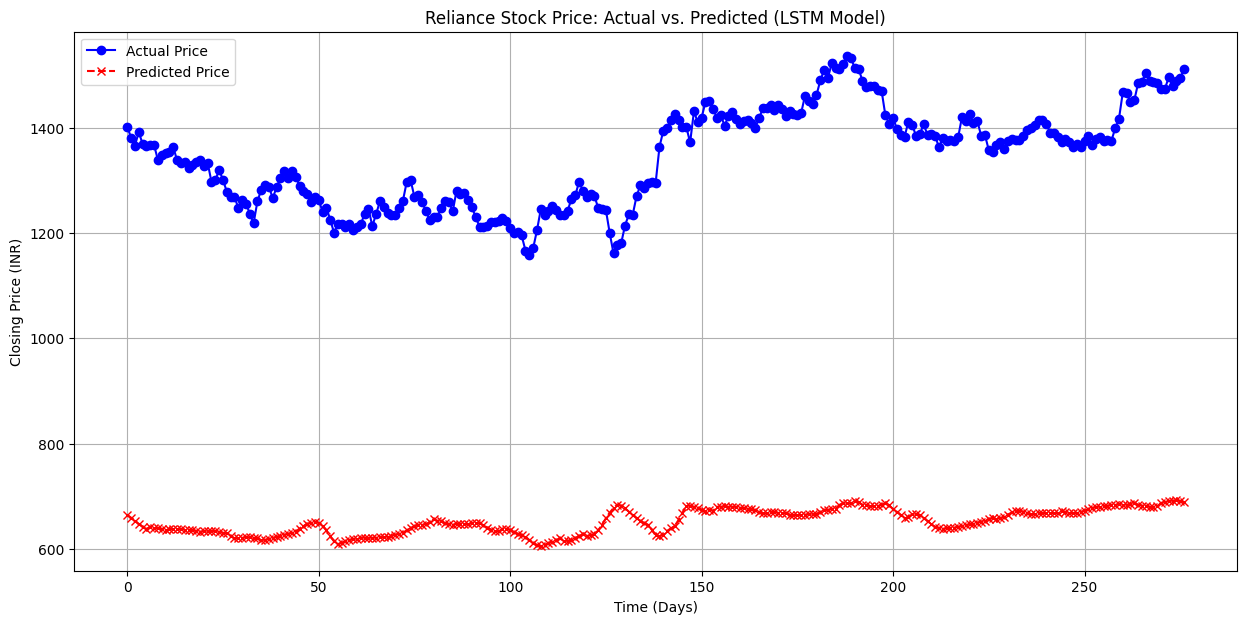

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Make Predictions on the Test Data ---
print("Making predictions on the test data...")
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actuals ---
# We need to reshape the data to have 5 columns to match the scaler's input shape
# Create a dummy array with the same shape as the original data
dummy_array_pred = np.zeros((len(predictions_scaled), 5))
# Place our predictions into the first column (the 'Close' price column)
dummy_array_pred[:, 0] = predictions_scaled.ravel()
# Inverse transform the dummy array
predictions_actual = scaler.inverse_transform(dummy_array_pred)[:, 0]

# Do the same for the y_test actual values
dummy_array_actual = np.zeros((len(y_test), 5))
dummy_array_actual[:, 0] = y_test.ravel()
y_test_actual = scaler.inverse_transform(dummy_array_actual)[:, 0]
print("✅ Predictions have been converted back to actual Rupee values.")


# --- 3. Evaluate the Model's Performance ---
mae = mean_absolute_error(y_test_actual, predictions_actual)
r2 = r2_score(y_test_actual, predictions_actual)
print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.2f} INR")
print(f"R-squared (R²) Score: {r2:.2f}")


# --- 4. Visualize the Results ---
plt.figure(figsize=(15, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue', marker='o', linestyle='-')
plt.plot(predictions_actual, label='Predicted Price', color='red', marker='x', linestyle='--')
plt.title('Reliance Stock Price: Actual vs. Predicted (LSTM Model)')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.grid(True)
plt.savefig('lstm_prediction_vs_actual.png')
plt.show()

In [17]:
print("Starting model training... this will take several minutes.")

# Train the model
# epochs=50 means the model will see the entire dataset 50 times
# batch_size=32 means the model will look at 32 samples at a time
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅✅✅ Model training complete!")

Starting model training... this will take several minutes.
Epoch 1/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - loss: 0.2149

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1667

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1363

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1186

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1064

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0969

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0893

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0833

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0783

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0742

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0705

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0674

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0645

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0620

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0598

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0577

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0558

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0533 - val_loss: 0.0046


Epoch 2/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0062

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0068

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0068

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0068

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0068

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0068 - val_loss: 0.0014


Epoch 3/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0063

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0052

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0052 - val_loss: 0.0016


Epoch 4/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0026

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0042 - val_loss: 0.0014


Epoch 5/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0044

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0044

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0046 - val_loss: 0.0024


Epoch 6/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0042

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0046

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0048

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0051

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0050

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0050

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0050 - val_loss: 0.0011


Epoch 7/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0070

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0058

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0054

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0052

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0050

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0049

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0045 - val_loss: 0.0013


Epoch 8/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0028

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0037 - val_loss: 0.0022


Epoch 9/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0048

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0038

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0035

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0034

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0032 - val_loss: 0.0013


Epoch 10/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0035

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0038 - val_loss: 0.0030


Epoch 11/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0036

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0034

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0034

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0035

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0035

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0035

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0035

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0035

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0037 - val_loss: 0.0013


Epoch 12/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0025

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0036

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0038

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0038

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0038

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0038

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0038

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0038

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0038 - val_loss: 0.0010


Epoch 13/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0039

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0034

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0034

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0034

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0032 - val_loss: 0.0013


Epoch 14/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0028

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0027

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0030

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0033 - val_loss: 0.0013


Epoch 15/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0033 - val_loss: 0.0013


Epoch 16/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0026

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0027 - val_loss: 0.0013


Epoch 17/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0029

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0032 - val_loss: 0.0036


Epoch 18/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0050

 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044

 6/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0043

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0038

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0036 - val_loss: 0.0018


Epoch 19/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0030

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0029 - val_loss: 0.0013


Epoch 20/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0024

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0028 - val_loss: 0.0013


Epoch 21/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0033

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0031 - val_loss: 0.0013


Epoch 22/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0041

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0037

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0030 - val_loss: 0.0021


Epoch 23/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0029

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0029 - val_loss: 0.0010


Epoch 24/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0028 - val_loss: 8.6856e-04


Epoch 25/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0026

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0025 - val_loss: 0.0023


Epoch 26/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0019

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0027 - val_loss: 7.5997e-04


Epoch 27/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0019

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0030 - val_loss: 0.0011


Epoch 28/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0030

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0031

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0030

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 8.0005e-04


Epoch 29/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0028

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0025 - val_loss: 0.0021


Epoch 30/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0026

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0027 - val_loss: 7.7560e-04


Epoch 31/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0026

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 0.0011


Epoch 32/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0024 - val_loss: 0.0012


Epoch 33/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0036

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0031

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0030

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0030

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0025 - val_loss: 0.0010


Epoch 34/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0028

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0025 - val_loss: 8.2605e-04


Epoch 35/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0020

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 7.3801e-04


Epoch 36/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0027

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0029

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 9.1729e-04


Epoch 37/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0018

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0017

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0017

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0017

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0017

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 6.4781e-04


Epoch 38/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0012

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 8.3869e-04


Epoch 39/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0018

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0026

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0027

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0024

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0023 - val_loss: 7.0398e-04


Epoch 40/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0018

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0023 - val_loss: 0.0015


Epoch 41/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0018

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 6.0878e-04


Epoch 42/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0027

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 7.5206e-04


Epoch 43/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0022

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 0.0032


Epoch 44/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0029

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

12/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

14/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

16/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0028

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 6.5946e-04


Epoch 45/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0022

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 7.8898e-04


Epoch 46/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0021

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0019

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0019 - val_loss: 9.7218e-04


Epoch 47/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0028

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0030

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029

 8/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027

10/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0024

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 8.4933e-04


Epoch 48/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0019

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0016

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0018

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0019 - val_loss: 6.5073e-04


Epoch 49/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0024

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0022

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0021

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 0.0013


Epoch 50/50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0023

 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

 5/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 7/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022

 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

11/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

13/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

15/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

21/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021

23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 0.0026



✅✅✅ Model training complete!


In [18]:
import joblib

# Save the trained LSTM model
model.save('lstm_model.h5')
print("✅ Model has been saved in .h5 format.")

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler has been saved to scaler.pkl.")

11/13/2025 02:40:45 PM - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


✅ Model has been saved in .h5 format.


✅ Scaler has been saved to scaler.pkl.
